In [92]:
import numpy as np
import csv
from PIL import Image
import time
start_time=time.time()

In [93]:
# mg = Image.open("./Images/beach/beach00.tif")
# mats = np.array(mg)
# # mg2 = Image.fromarray(mats) #原图

# x=mats.flatten()
# print(x)
# print(x.shape)
# print(mats)

In [94]:
#图片预处理
m=100 #100张图片
n=256*256*3 #一张图片的维度为256*256*3(pixel数量为256*256，一个pixel由3通道rgb来表示)
picturename=[] #存放图片的路径
mg = Image.open("./Images/agricultural/agricultural00.tif")
mat=np.array(mg)
mg=Image.fromarray(mat)
pictures = np.array(mg).flatten()
for i in range(1,10):
    picturename.append('./Images/agricultural/agricultural0'+str(i)+'.tif')
for i in range(10,100):
    picturename.append('./Images/agricultural/agricultural'+str(i)+'.tif')
for pic in picturename:
    img=Image.open(pic)
    picture=np.array(img).flatten()
    pictures=np.row_stack((pictures,picture)) #把向量叠在一起，叠成矩阵

# print(pictures)
# print(pictures.shape)

In [95]:
print(mat)

[[[ 44  41  45]
  [ 53  50  56]
  [ 47  44  50]
  ...
  [125 126 122]
  [137 137 130]
  [119 119 111]]

 [[ 41  38  42]
  [ 46  43  46]
  [ 44  41  45]
  ...
  [ 83  83  81]
  [124 124 118]
  [135 131 126]]

 [[ 42  39  43]
  [ 44  41  44]
  [ 43  40  44]
  ...
  [ 90  95  91]
  [ 99 103  98]
  [101  99  97]]

 ...

 [[175 173 175]
  [190 191 189]
  [223 223 221]
  ...
  [144 144 136]
  [135 135 126]
  [124 123 118]]

 [[120 113 120]
  [151 147 150]
  [168 166 165]
  ...
  [123 121 117]
  [126 121 117]
  [133 129 124]]

 [[128 118 127]
  [113 103 110]
  [122 114 118]
  ...
  [101 101  99]
  [ 99  95  94]
  [135 129 127]]]


In [96]:
#求协方差矩阵
#Y为去中心化后的pictures
x_mean=np.zeros(n)
for i in range(n):
    x_mean[i]=pictures[:,i].mean()

Y=np.zeros((m,n)) #cov=Y*Y^T
for i in range(m):
    y=pictures[i,:]-x_mean
    Y[i]=y
C=np.dot(Y,Y.T)/(m-1) #C为协方差矩阵
print(C.shape)

(100, 100)


用降阶技术和幂法可以算出所有特征值，但不一定可以算出所有特征向量，因为用幂法的话如果遇上一个特征值对应多个特征向量的话，只能求出其特征向量的一个线性组合

In [97]:
#求特征值
#QR分解
def qrSplit(A):
    n=A.shape[0]#A的维度
    Q=[[]]
    R=A
    for i in range(0,n-1):
        B=R
        if i!=0:
            #删除一行一列,得n-1阶子阵
            B=B[i:,i:]
        #取第一列向量
        x=B[:,0]
        #向量摸长
        m=np.linalg.norm(x)
        #生成一个模长为m，其余项为0的向量y
        y=[0 for j in range(0,n-i)]
        y[0]=m
        #计算householder反射矩阵
        #w = (x-y)/||x-y||
        w=x-y
        w=w/np.linalg.norm(w)
        #H=E-2*WT*W
        H=np.eye(n-i)-2*np.dot(w.reshape(n-i,1),w.reshape(1,n-i))#H是个正交矩阵
        #第一次计算不需对正交正H升维
        if i==0: 
            #第一次迭代
            Q=H
            R=np.dot(H,R)
        else:
            #因为降了维度，所以要拼接单位矩阵
            D=np.c_[np.eye(i),np.zeros((i,n-i))]
            H=np.c_[np.zeros((n-i,i)),H]
            H=np.r_[D,H]
            #迭代计算正交矩阵Q和上三角R
            Q=np.dot(H,Q)
            R=np.dot(H,R)
    Q=Q.T
    return [Q,R]

In [98]:
#QR迭代求特征值特征向量
def  qrEgis(A):
    # QR迭代(尽量让它多迭代几次，以至于AK收敛为上三角)
    qr = []
    n = A.shape[0]  # A的维度
    Q = np.eye(n)
    for i in range(0, 100):
        # A=QR
        qr = qrSplit(A)
        # 将Q右边边累成
        Q = np.dot(Q,qr[0])
        # A1=RQ
        A = np.dot(qr[1], qr[0])

    AK = np.dot(qr[0], qr[1])
    #把e取出来
    e=[] 
    for i in range(0,n):
        e.append(AK[i][i])
    #对特征值按降序排序(冒泡排序)，特征向量与其对应
    for i in range(0,n-1):
        max=e[i]
        for j in range(i+1,n):
            if e[j]>max:
                max=e[j]
                #交换特征值
                tmp=e[i]
                e[i]=e[j]
                e[j]=tmp
                #交换特征向量
                r=np.copy(Q[:,i])
                Q[:,i]=Q[:,j]
                Q[:,j]=r;
    return [e,Q] #e存储特征值，Q存储特征向量

In [99]:
#测试用
# A=np.array([1,2,3,4,2,1,2,3,3,2,1,2,4,3,2,1])
# A=A.reshape(4,4)
# print('A原来的样子')
# print(A)
# qr = qrSplit(A)
# print('打印Q,R')
# print(qr[0])
# print(qr[1])
# print('打印Q*R')
# print(np.dot(qr[0],qr[1]))

# print("******************************************")

# egis =qrEgis(A)
# print('自己写的QR分解')
# print("eigenvalues:")
# print(egis[0]);
# print('eigenvectors:')
# print(egis[1]);
# print("C=UsumU^T:")
# print(np.dot())
# print('numpy自带的分解器')
# e,u=np.linalg.eigh(A);
# print(e)
# print('.....')
# print(u)

# length=len(egis[0])
# B=np.eye(len(egis[0])) #B为由特征值构成的矩阵
# for i in range(length):
#     B[i][i]=egis[0][i]
# U=egis[1] 
# X=np.dot(U,B)
# X=np.dot(X,U.T)
# print(X)

In [100]:
egis =qrEgis(C)
print('自己写的QR分解')
# print(egis[0]);
# print('......')
print(egis[1]);
print('numpy自带的分解器')
e,u=np.linalg.eigh(C);
# print(e)
# print('.....')
print(u)

自己写的QR分解
[[ 5.72400873e-02  2.41859675e-02  2.26759571e-02 ...  5.47280619e-03
   2.51636167e-03  1.00000000e-01]
 [ 4.04573758e-02  2.50731722e-02  1.68046158e-02 ...  1.12568658e-02
   3.36178013e-03  1.00000000e-01]
 [ 5.15745117e-02  5.11466201e-02  2.56612343e-02 ...  1.96645179e-03
  -2.99159392e-03  1.00000000e-01]
 ...
 [ 9.09675831e-02  2.18395272e-02  1.54045301e-02 ...  1.07513451e-02
  -1.74693907e-05  1.00000000e-01]
 [-6.06792235e-02 -6.58465071e-02  3.64357839e-02 ... -2.59777498e-03
  -1.95350307e-03  1.00000000e-01]
 [-3.35574399e-02 -2.96451096e-01 -1.61312704e-02 ... -2.57141000e-03
  -4.15249672e-03  1.00000000e-01]]
numpy自带的分解器
[[-1.00000000e-01  2.51636167e-03 -5.45422111e-03 ...  2.26759595e-02
  -2.41859674e-02  5.72400873e-02]
 [-1.00000000e-01  3.36178013e-03 -1.12897590e-02 ...  1.68046183e-02
  -2.50731722e-02  4.04573758e-02]
 [-1.00000000e-01 -2.99159392e-03 -1.90755234e-03 ...  2.56612365e-02
  -5.11466200e-02  5.15745118e-02]
 ...
 [-1.00000000e-01 -1.74

$B=\sum$

In [101]:
#利用QR分解来特征分解
length=len(egis[0])
B=np.eye(len(egis[0])) #B为由特征值构成的矩阵
for i in range(length):
    B[i][i]=egis[0][i]
U=egis[1] 

In [102]:
#PCA
x=0.9 #x为解释率
eigvalue_sum=sum(egis[0])
count=0
i=0
while(count<x*eigvalue_sum):
    count+=egis[0][i]
    i+=1
print("选取了%d个主成分"%(i))
print("对数据降维，从%d维降到%d维"%(n,i))
W=U[:,0:i] #W^T为对数据进行降维变换的矩阵
pictures_new=np.dot(W,W.T)
pictures_new=np.dot(pictures_new,Y)
for i in range(m):
    pictures_new[i]=pictures_new[i,:]+x_mean

选取了40个主成分
对数据降维，从196608维降到40维


In [103]:
end_time=time.time()
print("average time cost:%f ms"%((end_time-start_time)/100*1000))

average time cost:37.545915 ms


In [104]:
print(W.shape)

(100, 40)


Image.fromarray() 不支持float32类型的数据

In [105]:
from numpy import uint8

compactImage=[]
for i in range(10):
    compactImage.append('./Images/compactImages/com_agricultural0'+str(i)+'.tif')
for i in range(10,100):
    compactImage.append('./Images/compactImages/com_agricultural'+str(i)+'.tif')

# for i in range(pictures_new.shape[0]):
#     pic=pictures_new[i,:]
#     pic=pic.reshape(256,256,3)
#     mg=Image.fromarray(uint8(pic))
#     mg.save(compactImage[i])
pic=pictures_new[4,:]
pic=pic.reshape(256,256,3)
mg=Image.fromarray(uint8(pic))

pic=pictures[4,:]
pic=pic.reshape(256,256,3)
mg_old=Image.fromarray(uint8(pic))

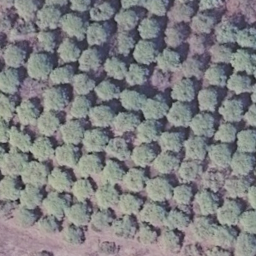

In [106]:
mg

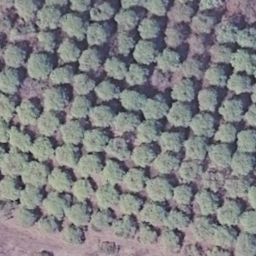

In [107]:
mg_old

In [108]:
#重构误差
def recon_error(i):   #recon_error(i)返回第i张图片的重构误差
    return np.linalg.norm(pictures_new[i,:]-pictures[i,:])

In [113]:
# for i in range(10):
#     print(recon_error(i))
count=0
for i in range(100):
    count+=recon_error(i)
print("average reconstruct error: %f"%(count/100))

3757.7152934684295
5754.787889386027
5154.907335461174
5769.785344271143
573.5060480790611
977.008853904264
539.9148708862662
4577.917033753968
4368.123518649153
582.9013760837299
average reconstruct error: 3965.826040


In [110]:
# sum=0
# for i in range(m):
#     print(mats[i][0],end=' ')
#     sum+=mats[i][0]
# print()
# print(sum/m)

In [111]:
# x=np.array([[2,4],[1,3]])
# y=np.eye(2)+np.array([[0,1],[0,0]])
# print(y)
# print(x)
# c=np.dot(y,x)/3
# print(c)